<a href="https://colab.research.google.com/github/Jirapat-K-F/Object_detection_w_FasterRCNN/blob/main/Hips_FRCNN_TORCH_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PreData

In [ ]:
import os
import torch
import cv2
import numpy as np
from torchvision import transforms
from PIL import Image
import yaml

In [ ]:
main_path = '/content/drive/MyDrive/New/Combined-grouped-fixed'

# Load YAML file
yaml_path = main_path+"/combined-grouped-fixed-test-only-new.yaml"
with open(yaml_path, "r") as file:
    data_info = yaml.safe_load(file)

# Paths
train_path = main_path+"/train"
validate_path = main_path+"/validate"
label_name = data_info["names"]

print(train_path)
print(validate_path)
print(label_name)

/content/drive/MyDrive/New/Combined-grouped-fixed/train
/content/drive/MyDrive/New/Combined-grouped-fixed/validate
{0: 'Troch', 1: 'Neck', 2: 'Normal', 3: 'Grouped Fixed'}


In [ ]:
from PIL import Image
import os

def is_corrupt_image(image_path):
    try:
        with Image.open(image_path) as img:
            img.verify()  # Verifies image integrity
        return False  # Image is fine
    except (IOError, SyntaxError):
        return True  # Image is corrupt

def check_images_in_folder(folder_path):
    total_images = 0
    corrupt_images = 0

    for filename in os.listdir(folder_path):
        file_path = os.path.join(folder_path, filename)
        if os.path.isfile(file_path):
            if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif', '.tiff')):
                total_images += 1
                if is_corrupt_image(file_path):
                    corrupt_images += 1
                    print(f"❌ Corrupt image detected: {file_path}")
                else:
                    print(f"✅ Image is fine: {file_path}")

    print("\nSummary:")
    print(f"Total images checked: {total_images}")
    print(f"✅ Fine images: {total_images - corrupt_images}")
    print(f"❌ Corrupt images: {corrupt_images}")

# Example usage
folder_path = main_path+'/validate/images'
check_images_in_folder(folder_path)


✅ Image is fine: /content/drive/MyDrive/New/Combined-grouped-fixed/validate/images/485-a.png
✅ Image is fine: /content/drive/MyDrive/New/Combined-grouped-fixed/validate/images/485-z.png
✅ Image is fine: /content/drive/MyDrive/New/Combined-grouped-fixed/validate/images/461-a.png
✅ Image is fine: /content/drive/MyDrive/New/Combined-grouped-fixed/validate/images/507-z.png
✅ Image is fine: /content/drive/MyDrive/New/Combined-grouped-fixed/validate/images/405-z2.png
✅ Image is fine: /content/drive/MyDrive/New/Combined-grouped-fixed/validate/images/405-a2.png
✅ Image is fine: /content/drive/MyDrive/New/Combined-grouped-fixed/validate/images/559-a.png
✅ Image is fine: /content/drive/MyDrive/New/Combined-grouped-fixed/validate/images/405-z.png
✅ Image is fine: /content/drive/MyDrive/New/Combined-grouped-fixed/validate/images/575-z.png
✅ Image is fine: /content/drive/MyDrive/New/Combined-grouped-fixed/validate/images/405-a.png
✅ Image is fine: /content/drive/MyDrive/New/Combined-grouped-fixed/v

In [ ]:
#verifies labels
import os

label_dir = train_path+"/labels"  # Change to your actual label directory

for file in os.listdir(label_dir):
    file_path = os.path.join(label_dir, file)

    cleaned_lines = []
    with open(file_path, "r") as f:
        for line in f:
            line = line.strip()  # Remove leading/trailing spaces
            if line:  # Ignore empty lines
                cleaned_lines.append(" ".join(line.split()))  # Remove extra spaces between values

    # Rewrite file with cleaned data
    with open(file_path, "w") as f:
        f.write("\n".join(cleaned_lines) + "\n")

print("✅ All label files cleaned successfully!")


✅ All label files cleaned successfully!


In [ ]:
# import os

label_dir = train_path+"/labels"  # Change to your actual label directory

for file in os.listdir(label_dir):
    file_path = os.path.join(label_dir, file)
    with open(file_path, "r") as f:
        lines = f.readlines()[:2]
        print(lines)
        for line in lines[:2]:
            values = line.strip().split()
            if len(values) != 5:
                print(f"❌ Incorrect format in {file}: {line.strip()}")
            try:
                class_id, x_center, y_center, width, height = map(float, values)

                # Ensure class_id is a valid integer and >= 0
                if not class_id.is_integer() or class_id < 0:
                    print(f"❌ Invalid class ID in {file}: {class_id}")

                # Ensure bbox values are within [0,1]
                if not (0 <= x_center <= 1 and 0 <= y_center <= 1 and 0 <= width <= 1 and 0 <= height <= 1):
                    print(f"❌ Invalid bbox in {file}: {values}")

            except ValueError:
                print(f"❌ Non-numeric values in {file}: {line.strip()}")


['2 0.194805 0.535098 0.302587 0.438597\n', '3 0.822594 0.612461 0.317661 0.588450\n']
['3 0.224063 0.414433 0.277715 0.633038\n', '2 0.782060 0.300398 0.329137 0.431289\n']
['0 0.774583 0.516543 0.305960 0.375731\n', '2 0.191209 0.570635 0.301570 0.428360\n']
['2 0.770224 0.395575 0.265033 0.438596\n', '3 0.208209 0.568820 0.272133 0.714914\n']
['2 0.755789 0.487241 0.248468 0.483916\n', '3 0.247018 0.602007 0.265033 0.701757\n']
['2 0.190025 0.525185 0.247385 0.394734\n', '3 0.794595 0.528108 0.311319 0.488304\n']
['3 0.272690 0.578772 0.303384 0.590091\n', '2 0.793898 0.628321 0.203654 0.469970\n']
['0 0.793492 0.615327 0.322305 0.428918\n', '2 0.227160 0.669085 0.286493 0.430051\n']
['2 0.802282 0.529345 0.240454 0.463452\n', '1 0.189790 0.564433 0.319272 0.463448\n']
['3 0.782351 0.563757 0.243544 0.737236\n', '2 0.299984 0.416611 0.234098 0.524024\n']
['3 0.222361 0.365927 0.280028 0.600000\n', '3 0.750567 0.358031 0.275584 0.605261\n']
['2 0.805248 0.496305 0.250834 0.505846\n',

In [ ]:
num_classes = 4  # Replace N with actual class count

for file in os.listdir(label_dir):
    file_path = os.path.join(label_dir, file)
    with open(file_path, "r") as f:
        lines = f.readlines()[:2]

        for line in lines:
            values = line.strip().split()
            if len(values) != 5:
                print(f"❌ Incorrect format in {file}: {line.strip()}")

            class_id, _, _, _, _ = map(float, values)
            if not (0 <= class_id < num_classes):  # Ensure class_id is valid
                print(f"❌ Invalid class ID {class_id} in {file}")


# Install librery

In [ ]:
pip install torch torchvision opencv-python numpy matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 48.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 31.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 31.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 90.0 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [ ]:
pip install sympy --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.2/6.2 MB 49.1 MB/s eta 0:00:00
  Attempting uninstall: sympy
    Found existing installation: sympy 1.13.1
    Uninstalling sympy-1.13.1:
      Successfully uninstalled sympy-1.13.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.6.0+cu124 requires sympy==1.13.1; python_version >= "3.9", but you have sympy 1.13.3 which is incompatible.


# Start Training

In [ ]:
import os
import torch
import cv2
import numpy as np
from torchvision import transforms
from PIL import Image
import yaml
import torchvision
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor
import torch.optim as optim
import shutil
from torch.amp import GradScaler
from torchvision.ops import box_iou


In [ ]:
# Enable mixed precision training for better performance
scaler = GradScaler("cuda")

# Enable fast GPU computations
torch.backends.cudnn.benchmark = True

class YOLODataset(torch.utils.data.Dataset):
    def __init__(self, img_dir, label_dir, classes, transforms=None):
        self.img_dir = img_dir
        self.label_dir = label_dir
        self.transforms = transforms
        self.classes = classes  # Class list (e.g., ["fracture"])
        self.image_files = [f for f in os.listdir(img_dir) if f.endswith('.png')]

    def __len__(self):
        return len(self.image_files)

    def __getitem__(self, idx):
        img_filename = self.image_files[idx]
        img_path = os.path.join(self.img_dir, img_filename)
        label_path = os.path.join(self.label_dir, img_filename.replace(".png", ".txt"))

        try:
            image = Image.open(img_path).convert("RGB")  # Load image
        except (SyntaxError, OSError):
            print(f"Skipping corrupted image: {img_path}")
            return self.__getitem__((idx + 1) % len(self))  # Load the next image instead

        img_width, img_height = image.size

        # Load YOLO annotations
        boxes = []
        labels = []
        if os.path.exists(label_path):
            with open(label_path, "r") as f:
                lines = f.readlines()[:2]
                for line in lines:
                    class_id, x_center, y_center, width, height = map(float, line.strip().split())

                    # Convert to absolute coordinates
                    x_min = (x_center - width / 2) * img_width
                    y_min = (y_center - height / 2) * img_height
                    x_max = (x_center + width / 2) * img_width
                    y_max = (y_center + height / 2) * img_height

                    boxes.append([x_min, y_min, x_max, y_max])
                    labels.append(int(class_id) + 1)  # Shift class ID (+1) since 0 is background

        boxes = torch.as_tensor(boxes, dtype=torch.float32)
        labels = torch.as_tensor(labels, dtype=torch.int64)

        target = {"boxes": boxes, "labels": labels}
        if self.transforms:
            image = self.transforms(image)

        return image, target



In [ ]:
main_path = '/content/drive/MyDrive/New/Combined-grouped-fixed'

# Load YAML file
yaml_path = main_path+"/combined-grouped-fixed-test-only-new.yaml"
with open(yaml_path, "r") as file:
    data_info = yaml.safe_load(file)

# Paths
train_path = main_path+"/train"
validate_path = main_path+"/validate"
label_name = data_info["names"]
print(label_name)

{0: 'Troch', 1: 'Neck', 2: 'Normal', 3: 'Grouped Fixed'}


In [ ]:
# Image transformations
transform = transforms.Compose([
    transforms.ToTensor()
])

# Load dataset
dataset = YOLODataset(img_dir=train_path + "/images", label_dir=train_path + "/labels", classes=label_name, transforms=transform)

# Adjust batch size for better memory usage(low for low mem)
batch_size = 8

data_loader = torch.utils.data.DataLoader(
    dataset, batch_size=batch_size, shuffle=True,
    collate_fn=lambda x: tuple(zip(*x)), pin_memory=True
)

In [ ]:
#Create a Validation Data Loader
# Load validation dataset
val_dataset = YOLODataset(
    img_dir=validate_path + "/images",
    label_dir=validate_path + "/labels",
    classes=label_name,
    transforms=transform
)

val_loader = torch.utils.data.DataLoader(
    val_dataset, batch_size=batch_size, shuffle=False,
    collate_fn=lambda x: tuple(zip(*x)), pin_memory=True
)

In [ ]:
#ResNet-50-FPN backbone
# Load Faster R-CNN model
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(weights="DEFAULT")

# Modify classifier for 2 classes (background + fracture)
num_classes = len(label_name) + 1  # Background + actual classes
in_features = model.roi_heads.box_predictor.cls_score.in_features
model.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_classes)

# Move model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth
100%|██████████| 160M/160M [00:01<00:00, 100MB/s] 


FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(

In [ ]:
# Optimizer
learing_rate = 0.005 #controls how much the model updates its weights during training
momentum = 0.9 #helps the optimizer move in a consistent direction by averaging past updates.
weight_decay = 0.0005 #L2 regularization that prevents the model from overfitting

optimizer = optim.SGD(model.parameters(), lr=0.005, momentum=0.9, weight_decay=0.0005)

# Learning rate scheduler
lr_scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.5)

# Number of epochs
num_epochs = 10

# Training loop
for epoch in range(num_epochs):
    model.train()
    epoch_loss = 0

    for images, targets in data_loader:
        images = [image.to(device) for image in images]
        targets = [{k: v.to(device) for k, v in t.items()} for t in targets]

        optimizer.zero_grad()

        # Mixed precision training
        with torch.amp.autocast("cuda"):
            loss_dict = model(images, targets)
            loss = sum(loss for loss in loss_dict.values())

        scaler.scale(loss).backward()
        scaler.step(optimizer)
        scaler.update()

        epoch_loss += loss.item()

    lr_scheduler.step()

    # Get current learning rate
    current_lr = optimizer.param_groups[0]['lr']

    # Print epoch stats
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}, Learning Rate: {current_lr:.6f}")

    # Save checkpoint every 5 epochs
    if (epoch + 1) % 5 == 0:
        checkpoint_path = f"/content/drive/MyDrive/Hip_Detection/faster_rcnn_checkpoint_epoch{epoch+1}.pth"
        torch.save(model.state_dict(), checkpoint_path)
        print(f"Checkpoint saved at {checkpoint_path}")

Skipping corrupted image: /content/drive/MyDrive/New/Combined-grouped-fixed/train/images/0335.png
Skipping corrupted image: /content/drive/MyDrive/New/Combined-grouped-fixed/train/images/546-a.png
Epoch [1/10], Loss: 30.9790, Learning Rate: 0.005000
Skipping corrupted image: /content/drive/MyDrive/New/Combined-grouped-fixed/train/images/0335.png
Skipping corrupted image: /content/drive/MyDrive/New/Combined-grouped-fixed/train/images/546-a.png
Epoch [2/10], Loss: 16.3505, Learning Rate: 0.005000
Skipping corrupted image: /content/drive/MyDrive/New/Combined-grouped-fixed/train/images/546-a.png
Skipping corrupted image: /content/drive/MyDrive/New/Combined-grouped-fixed/train/images/0335.png
Epoch [3/10], Loss: 14.1669, Learning Rate: 0.005000
Skipping corrupted image: /content/drive/MyDrive/New/Combined-grouped-fixed/train/images/0335.png
Skipping corrupted image: /content/drive/MyDrive/New/Combined-grouped-fixed/train/images/546-a.png
Epoch [4/10], Loss: 12.1391, Learning Rate: 0.005000


In [ ]:
# Save final trained model
final_model_path = "/content/drive/MyDrive/Hip_Detection/faster_rcnn_combined_group_fix_v03.pth"
torch.save(model.state_dict(), final_model_path)
print(f"Final model saved at {final_model_path}")


Final model saved at /content/drive/MyDrive/Hip_Detection/faster_rcnn_combined_group_fix_v03.pth


# Test model

In [ ]:
!pip install torchmetrics
!pip install torcheval

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 961.5/961.5 kB 49.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 56.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 46.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 41.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 42.3 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

In [ ]:
import torch
import os
import cv2
import numpy as np
import torchvision
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt
from torchvision.ops import box_iou
from torchmetrics.detection.mean_ap import MeanAveragePrecision
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor
import yaml
from torch.utils.data import DataLoader
from collections import defaultdict
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from torcheval.metrics import MulticlassPrecision, MulticlassRecall, MulticlassF1Score

In [ ]:
main_path = '/content/drive/MyDrive/New/Combined-grouped-fixed'

# Load YAML file
yaml_path = main_path+"/combined-grouped-fixed-test-only-new.yaml"
with open(yaml_path, "r") as file:
    data_info = yaml.safe_load(file)

# Paths
train_path = main_path+"/train"
validate_path = main_path+"/validate"
label_name = data_info["names"]
print(label_name)

{0: 'Troch', 1: 'Neck', 2: 'Normal', 3: 'Grouped Fixed'}


In [ ]:
# Set the number of classes (including background)
num_classes = len(label_name)+1  # Change this based on your training dataset

# Load a base Faster R-CNN model
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(weights="DEFAULT")

# Modify the classifier to match the number of classes
in_features = model.roi_heads.box_predictor.cls_score.in_features
model.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_classes)

# Now load the trained weights
# model_path = "/content/drive/MyDrive/Hip_Detection/faster_rcnn_combined_group_fix_v02.pth"
model_path = "/content/drive/MyDrive/Hip_Detection/faster_rcnn_combined_group_fix_v03.pth"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.load_state_dict(torch.load(model_path, map_location=device))

# Move model to device
model.to(device)
model.eval()

print("Model loaded successfully!")


Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth
100%|██████████| 160M/160M [00:01<00:00, 88.3MB/s]


Model loaded successfully!


In [ ]:
#dataset
# Enable mixed precision training for better performance
# scaler = GradScaler("cuda")

# # Enable fast GPU computations
# torch.backends.cudnn.benchmark = True

class YOLODataset(torch.utils.data.Dataset):
    def __init__(self, img_dir, label_dir, classes, transforms=None):
        self.img_dir = img_dir
        self.label_dir = label_dir
        self.transforms = transforms
        self.classes = classes  # Class list (e.g., ["fracture"])
        self.image_files = [f for f in os.listdir(img_dir) if f.endswith('.png')]

    def __len__(self):
        return len(self.image_files)

    def __getitem__(self, idx):
        img_filename = self.image_files[idx]
        img_path = os.path.join(self.img_dir, img_filename)
        label_path = os.path.join(self.label_dir, img_filename.replace(".png", ".txt"))

        try:
            image = Image.open(img_path).convert("RGB")  # Load image
        except (SyntaxError, OSError):
            print(f"Skipping corrupted image: {img_path}")
            return self.__getitem__((idx + 1) % len(self))  # Load the next image instead

        img_width, img_height = image.size

        # Load YOLO annotations
        boxes = []
        labels = []
        if os.path.exists(label_path):
            with open(label_path, "r") as f:
                lines = f.readlines()[:2]
                for line in lines:
                    class_id, x_center, y_center, width, height = map(float, line.strip().split())

                    # Convert to absolute coordinates
                    x_min = (x_center - width / 2) * img_width
                    y_min = (y_center - height / 2) * img_height
                    x_max = (x_center + width / 2) * img_width
                    y_max = (y_center + height / 2) * img_height

                    boxes.append([x_min, y_min, x_max, y_max])
                    labels.append(int(class_id) + 1)  # Shift class ID (+1) since 0 is background

        boxes = torch.as_tensor(boxes, dtype=torch.float32)
        labels = torch.as_tensor(labels, dtype=torch.int64)

        target = {"boxes": boxes, "labels": labels}
        if self.transforms:
            image = self.transforms(image)

        return image, target



In [ ]:
# Validation dataset paths
validate_img_dir = validate_path+"/images"
validate_label_dir = validate_path+"/labels"

# Define transformations for inference
transform = transforms.Compose([
    transforms.ToTensor()
])

val_dataset = YOLODataset(img_dir=validate_img_dir, label_dir=validate_label_dir, classes=label_name, transforms=transform)
val_loader = DataLoader(val_dataset, batch_size=1, shuffle=False, collate_fn=lambda x: tuple(zip(*x)))


In [ ]:
exclude_class = 0  # Class 0 is the background
num_classes_without_bg = num_classes - 1  # Excluding background

all_gt = []
all_preds = []

iou_threshold = 0.5
confidence_threshold = 0.5

# Initialize Mean Average Precision (mAP) metric
# metric = MeanAveragePrecision(iou_type="bbox")
metric = MeanAveragePrecision(iou_type="bbox", class_metrics=True)

with torch.no_grad():
    for images, targets in val_loader:
        images = [img.to(device) for img in images]
        outputs = model(images)

        outputs = [{k: v.cpu() for k, v in out.items()} for out in outputs]
        targets = [{k: v.cpu() for k, v in t.items()} for t in targets]

        # Update metric with batch results
        metric.update(outputs, targets)

        for pred, target in zip(outputs, targets):
            pred_boxes = pred['boxes'][pred['scores'] > confidence_threshold]
            pred_labels = pred['labels'][pred['scores'] > confidence_threshold]

            gt_boxes = target['boxes']
            gt_labels = target['labels']

            matched_gt = set()
            ious = box_iou(pred_boxes, gt_boxes) if len(pred_boxes) and len(gt_boxes) else torch.zeros((len(pred_boxes), len(gt_boxes)))

            for pred_idx in range(len(pred_boxes)):
                max_iou, gt_idx = torch.max(ious[pred_idx], dim=0) if len(gt_boxes) else (0, -1)
                if len(gt_boxes):
                    max_iou, gt_idx = torch.max(ious[pred_idx], dim=0)
                    if max_iou > iou_threshold and gt_idx.item() not in matched_gt:
                        matched_gt.add(gt_idx.item())
                        pred_class = pred_labels[pred_idx].item()
                        gt_class = gt_labels[gt_idx].item()
                        all_preds.append(pred_class)
                        all_gt.append(gt_class)
                    else:
                        # False positive (no match or already matched)
                        all_preds.append(pred_labels[pred_idx].item())
                        all_gt.append(-1)  # Indicates no corresponding GT
                else:
                    all_preds.append(pred_labels[pred_idx].item())
                    all_gt.append(-1)

            # Remaining unmatched ground truths → False Negatives
            for gt_idx in range(len(gt_boxes)):
                if gt_idx not in matched_gt:
                    all_preds.append(-1)
                    all_gt.append(gt_labels[gt_idx].item())




# Filter out unmatched (label -1) and background class (class 0)
filtered_pairs = [(gt, pred) for gt, pred in zip(all_gt, all_preds)
                  if gt != -1 and pred != -1 and gt != exclude_class and pred != exclude_class]

filtered_gt = [gt-1 for gt, _ in filtered_pairs]
filtered_preds = [pred-1 for _, pred in filtered_pairs]

# Ensure there's valid data for confusion matrix computation



{'map': tensor(0.6677), 'map_50': tensor(0.9589), 'map_75': tensor(0.8178), 'map_small': tensor(-1.), 'map_medium': tensor(-1.), 'map_large': tensor(0.6677), 'mar_1': tensor(0.7195), 'mar_10': tensor(0.7496), 'mar_100': tensor(0.7496), 'mar_small': tensor(-1.), 'mar_medium': tensor(-1.), 'mar_large': tensor(0.7496), 'map_per_class': tensor([0.6470, 0.6723, 0.5864, 0.7652]), 'mar_100_per_class': tensor([0.7593, 0.7633, 0.6672, 0.8086]), 'classes': tensor([1, 2, 3, 4], dtype=torch.int32)}
--------------------mAP score--------------------

Class                mAP[50:95] mAP[50]   
All                  0.67       0.96      
Troch                0.65       0.76      
Neck                 0.67       0.76      
Normal               0.59       0.67      
Grouped Fixed        0.77       0.81      


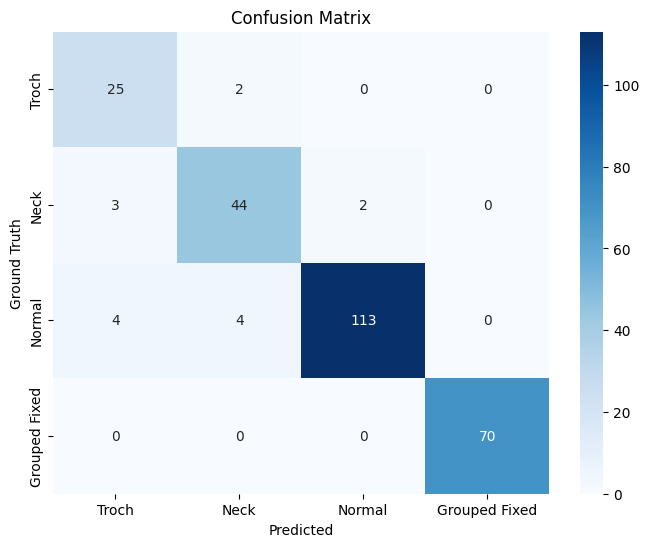

In [ ]:
if len(filtered_preds) > 0 and len(filtered_gt) > 0:
    # Compute confusion matrix
    cm = confusion_matrix(filtered_gt, filtered_preds, labels=list(range(num_classes_without_bg)))

    # Compute mAP
    map_metrics = metric.compute()

    # Print mAP results
    print(map_metrics)
    print("--------------------mAP score--------------------")
    print(f"\n{'Class':<20} {'mAP[50:95]':<10} {'mAP[50]':<10}")
    print(f"{'All':<20} {map_metrics['map']:<10.2f} {map_metrics['map_50']:<10.2f}")
    for i in range (0,4):
      print(f"{label_name[i]:<20} {map_metrics['map_per_class'][i]:<10.2f} {map_metrics['mar_100_per_class'][i]:<10.2f}")
    # Plotting confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[label_name[i] for i in range(4)], yticklabels=[label_name[i] for i in range(4)])
    plt.xlabel("Predicted")
    plt.ylabel("Ground Truth")
    plt.title("Confusion Matrix")
    plt.show()
else:
    print("No valid predictions or ground truths to compute metrics.")

In [ ]:
print("-"*10,"mAP score","-"*20)
print(f"{'Class':<20} {'mAP[50:95]':<10} {'mAP[50]':<10}")
print(f"{'All':<20} {map_metrics['map']:<10.2f} {map_metrics['map_50']:<10.2f}")
for i in range (1,5):
  print(f"{label_name[i-1]:<20} {map_metrics['map_per_class'][i-1]:<10.2f} {map_metrics['mar_100_per_class'][i-1]:<10.2f}")

---------- mAP score --------------------
Class                mAP[50:95] mAP[50]   
All                  0.67       0.96      
Troch                0.65       0.76      
Neck                 0.67       0.76      
Normal               0.59       0.67      
Grouped Fixed        0.77       0.81      


In [ ]:
# Convert to tensors
preds_tensor = torch.tensor(filtered_preds).clone().detach()
gt_tensor = torch.tensor(filtered_gt).clone().detach()

# Ensure that the values in preds_tensor and gt_tensor are within the valid class range [0, num_classes-1]
valid_idx = (preds_tensor >= 0) & (preds_tensor < num_classes) & (gt_tensor >= 0) & (gt_tensor < num_classes)

# Filter out invalid values
filtered_preds = preds_tensor[valid_idx]
filtered_gt = gt_tensor[valid_idx]

# Initialize the per-class metrics (average=None)
precision_cls = MulticlassPrecision(num_classes=num_classes_without_bg, average=None)
recall_cls = MulticlassRecall(num_classes=num_classes_without_bg, average=None)
f1_cls = MulticlassF1Score(num_classes=num_classes_without_bg, average=None)

# Update the per-class metrics
precision_cls.update(filtered_preds, filtered_gt)
recall_cls.update(filtered_preds, filtered_gt)
f1_cls.update(filtered_preds, filtered_gt)

# Get the set of valid (present) classes
present_classes = torch.unique(torch.cat([filtered_preds, filtered_gt])).tolist()
num_present_classes = len(present_classes)

# Use metrics only over present classes
prec_macro = MulticlassPrecision(num_classes=num_present_classes, average="macro")
recall_macro = MulticlassRecall(num_classes=num_present_classes, average="macro")
f1_macro = MulticlassF1Score(num_classes=num_present_classes, average="macro")

prec_micro = MulticlassPrecision(num_classes=num_present_classes, average="micro")
recall_micro = MulticlassRecall(num_classes=num_present_classes, average="micro")
f1_micro = MulticlassF1Score(num_classes=num_present_classes, average="micro")


# Update all overall metrics
for m in [prec_macro, recall_macro, f1_macro,
          prec_micro, recall_micro, f1_micro,
          ]:
    m.update(filtered_preds, filtered_gt)

# Print formatted table for per-class results
print(f"\n{'Class':<20} {'Precision':<10} {'Recall':<10} {'F1 Score':<10}")
print("-" * 60)

per_class_precision = precision_cls.compute()
per_class_recall = recall_cls.compute()
per_class_f1 = f1_cls.compute()

for i in range(num_classes_without_bg):
    cname = label_name[i]
    print(f"{cname:<20} {per_class_precision[i]:<10.2f} {per_class_recall[i]:<10.2f} {per_class_f1[i]:<10.2f}")

# Add summary metrics
print("-" * 60)
print(f"{'Macro Avg':<20} {prec_macro.compute().item():<10.2f} {recall_macro.compute().item():<10.2f} {f1_macro.compute().item():<10.2f}")
print(f"{'Micro Avg':<20} {prec_micro.compute().item():<10.2f} {recall_micro.compute().item():<10.2f} {f1_micro.compute().item():<10.2f}")



Class                Precision  Recall     F1 Score  
------------------------------------------------------------
Troch                0.78       0.93       0.85      
Neck                 0.88       0.90       0.89      
Normal               0.98       0.93       0.96      
Grouped Fixed        1.00       1.00       1.00      
------------------------------------------------------------
Macro Avg            0.91       0.94       0.92      
Micro Avg            0.94       0.94       0.94      


485-a.png


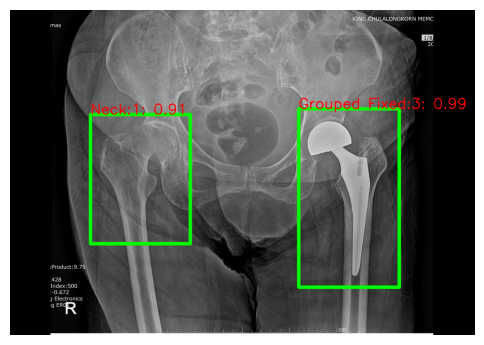

485-z.png


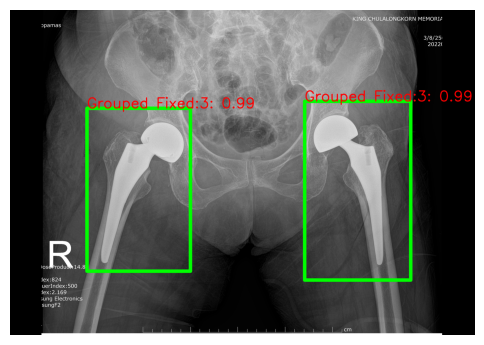

461-a.png


In [ ]:
#show img
# Get list of validation images
image_files = [f for f in os.listdir(validate_path+'/images') if f.endswith(".png")]

# Function to make predictions
def predict(image_path):
    image = Image.open(image_path).convert("RGB")
    img_tensor = transform(image).unsqueeze(0).to(device)  # Add batch dimension

    with torch.no_grad():  # No need to track gradients during inference
        predictions = model(img_tensor)

    return predictions[0]  # Get first (and only) batch result

# Loop through some validation images and test
import os

# Directory to save results
save_dir = "output_results"
os.makedirs(save_dir, exist_ok=True)

# Loop through some validation images and test
for img_filename in image_files[:5]:  # Change to test more images
    img_path = os.path.join(validate_img_dir, img_filename)
    predictions = predict(img_path)

    # Extract boxes, labels, and scores
    boxes = predictions["boxes"].cpu().numpy()
    labels = predictions["labels"].cpu().numpy()
    scores = predictions["scores"].cpu().numpy()

    # Load image with OpenCV for visualization
    img_cv = cv2.imread(img_path)
    img_cv = cv2.cvtColor(img_cv, cv2.COLOR_BGR2RGB)
    print(img_filename)
    # Draw bounding boxes
    for box, label, score in zip(boxes, labels, scores):
        if score > 0.5:  # Confidence threshold
            x_min, y_min, x_max, y_max = map(int, box)
            cv2.rectangle(img_cv, (x_min, y_min), (x_max, y_max), (0, 255, 0), 50)
            cv2.putText(img_cv, f"{label_name[label-1]}:{label-1}: {score:.2f}", (x_min, y_min - 5),
                        cv2.FONT_HERSHEY_SIMPLEX, 7, (255, 0, 0), 15)

    # Convert back to BGR before saving (OpenCV uses BGR)
    # img_bgr = cv2.cvtColor(img_cv, cv2.COLOR_RGB2BGR)
    # save_path = os.path.join(save_dir, img_filename)
    # cv2.imwrite(save_path, img_bgr)
    # print(f"Saved: {save_path}")

    # Show image with detections
    plt.figure(figsize=(6, 6))
    plt.imshow(img_cv)
    plt.axis("off")
    plt.show()
